In [1]:
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
import numpy as np

In [2]:
def get_dt():
    dt_stamp = dt.datetime.now()
    dt_stamp = dt_stamp.strftime("%Y_%m_%d_%H%M%S")
    dt_stamp = str(dt_stamp).split(".")[0]
    return dt_stamp

In [3]:
csv_data = pd.read_csv('C:/C_Drive/Bootcamp/ProjectData/U.S._Chronic_Disease_Indicators__CDI_ (1).csv')


C:\Users\inlik\AppData\Local\Temp\ipykernel_11988\2391643470.py:1: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  csv_data = pd.read_csv('C:/C_Drive/Bootcamp/ProjectData/U.S._Chronic_Disease_Indicators__CDI_ (1).csv')


In [4]:
csv_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1185676 entries, 0 to 1185675
Data columns (total 34 columns):
 #   Column                     Non-Null Count    Dtype  
---  ------                     --------------    -----  
 0   YearStart                  1185676 non-null  int64  
 1   YearEnd                    1185676 non-null  int64  
 2   LocationAbbr               1185676 non-null  object 
 3   LocationDesc               1185676 non-null  object 
 4   DataSource                 1185676 non-null  object 
 5   Topic                      1185676 non-null  object 
 6   Question                   1185676 non-null  object 
 7   Response                   0 non-null        float64
 8   DataValueUnit              1033553 non-null  object 
 9   DataValueType              1185676 non-null  object 
 10  DataValue                  806942 non-null   object 
 11  DataValueAlt               804578 non-null   float64
 12  DataValueFootnoteSymbol    393710 non-null   object 
 13  DatavalueFoo

In [231]:
df = csv_data.loc[(csv_data['Topic'] == 'Cancer') & (csv_data['Question'] == 'Invasive cancer (all sites combined), incidence')
                   & (csv_data['Question'] == 'Invasive cancer (all sites combined), incidence')
                    & (csv_data['DataValueType'] == 'Average Annual Number')
                    & (csv_data['StratificationCategory1'] == 'Race/Ethnicity')
                    & (csv_data['YearEnd'] >= 2015)
                    & ((csv_data['Stratification1'] == 'Black, non-Hispanic')
                    | (csv_data['Stratification1'] == 'Hispanic')
                    | (csv_data['Stratification1'] == 'White, non-Hispanic'))]
# df1 = df.groupby(['YearStart','YearEnd', 'LocationAbbr', 'LocationDesc', 'DataSource', 'Topic',
#                    'Question', 'StratificationCategory1', 'Stratification1', 'DataValueUnit', 'DataValueType'], as_index=False)['DataValue'].first()
df1 = df.groupby(['YearEnd', 'LocationDesc', 'Stratification1'], as_index=False)['DataValue'].first()
df2 = df1.sort_values(by= ['Stratification1', 'LocationDesc', 'YearEnd'], ascending=[True, True, True])
df2.head()

,YearEnd,LocationDesc,Stratification1,DataValue
0,2015,Alabama,"Black, non-Hispanic",5605.0
156,2016,Alabama,"Black, non-Hispanic",5750.0
312,2017,Alabama,"Black, non-Hispanic",5881.0
468,2018,Alabama,"Black, non-Hispanic",5968.0
624,2019,Alabama,"Black, non-Hispanic",6062.0


In [232]:
df2.insert(1,'Race_Clean', 'Race')

In [233]:
df2.loc[df2['Stratification1'] == 'Black, non-Hispanic', 'Race_Clean'] = 'Black'
df2.loc[df2['Stratification1'] == 'Hispanic', 'Race_Clean'] = 'Hispanic'
df2.loc[df2['Stratification1'] == 'White, non-Hispanic', 'Race_Clean'] = 'White'
df2 = df2.drop('Stratification1', axis=1)


In [234]:
df2.head()

,YearEnd,Race_Clean,LocationDesc,DataValue
0,2015,Black,Alabama,5605.0
156,2016,Black,Alabama,5750.0
312,2017,Black,Alabama,5881.0
468,2018,Black,Alabama,5968.0
624,2019,Black,Alabama,6062.0


In [235]:
df2.rename(columns={'YearEnd': 'Year', 'LocationDesc': 'State', 'DataValue': 'Insidents'}, inplace=True)

In [236]:
df2.loc[df2['Race_Clean'] == 'Hispanic']

,Year,Race_Clean,State,Insidents
1,2015,Hispanic,Alabama,200.0
157,2016,Hispanic,Alabama,210.0
313,2017,Hispanic,Alabama,227.0
469,2018,Hispanic,Alabama,244.0
625,2019,Hispanic,Alabama,257.0
...,...,...,...,...
154,2015,Hispanic,Wyoming,108.0
310,2016,Hispanic,Wyoming,112.0
466,2017,Hispanic,Wyoming,114.0
622,2018,Hispanic,Wyoming,123.0


In [242]:
df2 = df2.loc[~df2['Insidents'].isna()]
df_clean = df2.dropna()
df2 = df_clean

In [243]:
df3 = df2.groupby('Race_Clean', as_index=False)['Race_Clean'].first()
df3.head()


,Race_Clean
0,Black
1,Hispanic
2,White


In [244]:
df_state = df2.groupby('State', as_index=False)['State'].first()
df_state.head()

,State
0,Alabama
1,Alaska
2,Arizona
3,Arkansas
4,California


In [245]:
for n, race in df3.iterrows():
    for i, state in df_state.iterrows():
        x = df2.loc[(df2['Race_Clean'] == race[0]) & (df2['State'] == state[0]), 'Year'].values
        y = df2.loc[(df2['Race_Clean'] == race[0]) & (df2['State'] == state[0]), 'Insidents'].values.astype(int)
        print(f'x: {x}, y: {y}, race: {race[0]}, state: {state[0]}')

x: [2015 2016 2017 2018 2019], y: [5605 5750 5881 5968 6062], race: Black, state: Alabama
x: [2015 2016 2017 2018 2019], y: [74 75 74 73 76], race: Black, state: Alaska
x: [2015 2016 2017 2018 2019], y: [870 901 938 968 978], race: Black, state: Arizona
x: [2015 2016 2017 2018 2019], y: [1992 2053 2128 2217 2275], race: Black, state: Arkansas
x: [2015 2016 2017 2018 2019], y: [10750 10674 10684 10668 10737], race: Black, state: California
x: [2015 2016 2017 2018 2019], y: [755 767 782 791 818], race: Black, state: Colorado
x: [2015 2016 2017 2018 2019], y: [1549 1595 1625 1652 1718], race: Black, state: Connecticut
x: [2015 2016 2017 2018 2019], y: [ 948  989 1007 1002 1006], race: Black, state: Delaware
x: [2015 2016 2017 2018 2019], y: [1904 1810 1770 1759 1732], race: Black, state: District of Columbia
x: [2015 2016 2017 2018 2019], y: [12210 12562 12861 13175 13287], race: Black, state: Florida
x: [2015 2016 2017 2018 2019], y: [12382 12898 13392 13848 14296], race: Black, state: G

In [ ]:
font = {'family': 'serif', 'color': 'darkred', 'weight': 'normal', 'size': 12}

for i, state in df_state.iterrows():
    fig = plt.figure(figsize=(25,6))
    fig.subplots_adjust(wspace=.3, top=.85, bottom=.4)
    fig.suptitle(f'{state[0]} Invasive Cancer Incidences by Race 2015 - 2019', fontsize=18, ha='center', color='darkred')

    for n, race in df3.iterrows():
        ax = fig.add_subplot(1, 3, n + 1)
        x = df2.loc[(df2['Race_Clean'] == race[0]) & (df2['State'] == state[0]), 'Year'].values.astype(str)
        y = df2.loc[(df2['Race_Clean'] == race[0]) & (df2['State'] == state[0]), 'Insidents'].values.astype(int)
        ax.plot(x, y, label=race[0])
        ax.set_xlabel('Year')
        ax.set_ylabel('# of Invasive Cancer Incidences')
        ax.legend()
        ax.set_title(f'{race[0]}', fontdict=font)
        # fig.tight_layout()
    

In [173]:
csv_data2 = pd.read_csv('C:/C_Drive/Bootcamp/ProjectData/export.csv')

In [189]:
csv_data2.head()

,Year,State,County,Race,Origin,Sex,Age1year,Count,Unemployed_pct,Med_fam_income,Med_house_income
0,1990,Alabama,1,White,Non-Spanish-Hispanic-Latino,Male,00 years,239,368,7110,5873
1,1990,Alabama,1,White,Non-Spanish-Hispanic-Latino,Male,01-04 years,190,368,7110,5873
2,1990,Alabama,1,White,Non-Spanish-Hispanic-Latino,Male,01-04 years,203,368,7110,5873
3,1990,Alabama,1,White,Non-Spanish-Hispanic-Latino,Male,01-04 years,220,368,7110,5873
4,1990,Alabama,1,White,Non-Spanish-Hispanic-Latino,Male,01-04 years,208,368,7110,5873


In [190]:
# df_pop_clean = df_pop.loc[(df_pop['Race'] == 'Black') | (df_pop['Race'] == 'White')]
df_pop = csv_data2.loc[(csv_data2['Race'] == 'Black') | (csv_data2['Race'] == 'White')]

In [191]:
# df_pop = csv_data2.groupby(['Year', 'State', 'Race', 'Origin'], as_index=False).agg({'Count': 'sum'})
df_pop_clean = df_pop.groupby(['Year', 'State', 'Race', 'Origin'], as_index=False).agg({'Count': 'sum'})

In [192]:
df_pop_clean.insert(1,'Race_Clean', 'Race')

In [193]:
df_pop_clean.head()

,Year,Race_Clean,State,Race,Origin,Count
0,1990,Race,Alabama,Black,Non-Spanish-Hispanic-Latino,1020916
1,1990,Race,Alabama,Black,Spanish-Hispanic-Latino,3282
2,1990,Race,Alabama,White,Non-Spanish-Hispanic-Latino,2967680
3,1990,Race,Alabama,White,Spanish-Hispanic-Latino,20084
4,1990,Race,Alaska,Black,Non-Spanish-Hispanic-Latino,21720


In [194]:
df_pop_clean.loc[(df_pop_clean['Race'] == 'Black') & (df_pop_clean['Origin'] == 'Non-Spanish-Hispanic-Latino'), 'Race_Clean'] = 'Black'
df_pop_clean.loc[(df_pop_clean['Race'] == 'White') & (df_pop_clean['Origin'] == 'Non-Spanish-Hispanic-Latino'), 'Race_Clean'] = 'White'
df_pop_clean.loc[(df_pop_clean['Origin'] == 'Spanish-Hispanic-Latino'), 'Race_Clean'] = 'Hispanic'
df_pop_clean = df_pop_clean.drop('Race', axis=1)
df_pop_clean = df_pop_clean.drop('Origin', axis=1)

In [195]:
df_pop_clean.head()

,Year,Race_Clean,State,Count
0,1990,Black,Alabama,1020916
1,1990,Hispanic,Alabama,3282
2,1990,White,Alabama,2967680
3,1990,Hispanic,Alabama,20084
4,1990,Black,Alaska,21720


In [265]:
df_pop_gb = df_pop_clean.groupby(['Year', 'State'], as_index=False).agg({'Count': 'sum'})

In [266]:
df_merge = pd.merge(df2, df_pop_gb, on=['Year', 'State'], how='outer')

In [282]:
df_merge2 = df_merge.loc[(df_merge['Year'] >= 2015) & (~df_merge['Race_Clean'].isna())]

In [286]:
df_analysis = df_merge2.loc[~df_merge2['Count'].isna()].copy()

In [292]:
df_analysis['Insidents_per_capita'] = df_analysis['Insidents'].values.astype(int) / (df_analysis['Count'].values / 1000)

In [293]:
df_analysis.head()

,Year,Race_Clean,State,Insidents,Count,Insidents_per_capita
0,2015,Black,Alabama,5605.0,4740460.0,1.182375
1,2015,Hispanic,Alabama,200.0,4740460.0,0.042190
2,2015,White,Alabama,19601.0,4740460.0,4.134831
3,2016,Black,Alabama,5750.0,4749439.0,1.210669
4,2016,Hispanic,Alabama,210.0,4749439.0,0.044216


In [297]:
df_merge_state = df_analysis.groupby('State', as_index=False)['State'].first()

In [298]:
df_merge_race = df_analysis.groupby('Race_Clean', as_index=False)['Race_Clean'].first()

In [302]:
df_merge_year = df_analysis.groupby('Year', as_index=False)['Year'].first()

In [ ]:
for i, year in df_merge_year.iterrows():
    for n, race in df_merge_race.iterrows():
        x = df_analysis.loc[(df_analysis['Race_Clean'] == race[0]) & (df_analysis['Year'] == year[0]), 'Year'].values.astype(str)
        y = df_analysis.loc[(df_analysis['Race_Clean'] == race[0]) & (df_analysis['State'] == year[0]), 'Insidents_per_capita'].values.astype(float)
        print(f'x: {x}, y: {y}, race: {race[0]}, state: {state[0]}')

ValueError: x and y must have same first dimension, but have shapes (47,) and (0,)

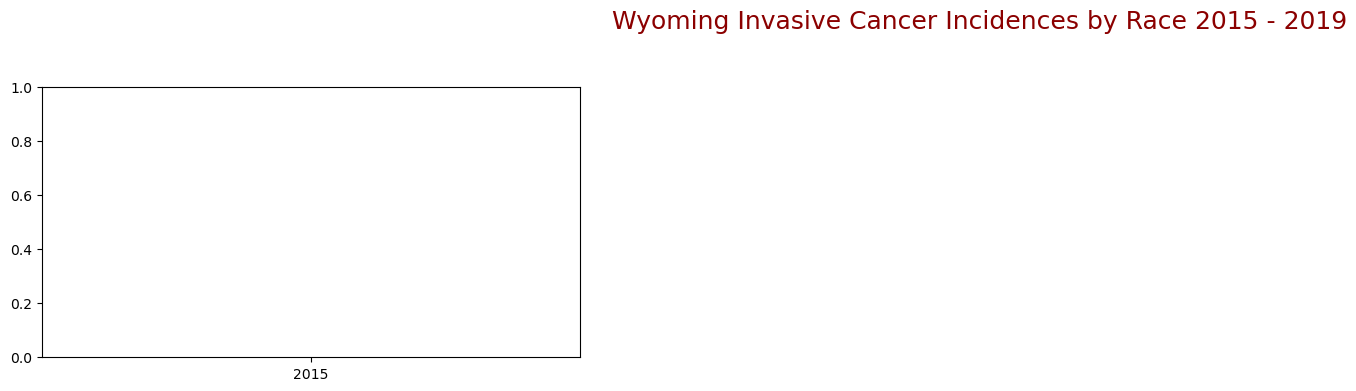

In [303]:
font = {'family': 'serif', 'color': 'darkred', 'weight': 'normal', 'size': 12}

for i, year in df_merge_year.iterrows():
    fig = plt.figure(figsize=(25,6))
    fig.subplots_adjust(wspace=.3, top=.85, bottom=.4)
    fig.suptitle(f'{state[0]} Invasive Cancer Incidences by Race 2015 - 2019', fontsize=18, ha='center', color='darkred')

    for n, race in df_merge_race.iterrows():
        ax = fig.add_subplot(1, 3, n + 1)
        x = df_analysis.loc[(df_analysis['Race_Clean'] == race[0]) & (df_analysis['Year'] == year[0]), 'Year'].values.astype(str)
        y = df_analysis.loc[(df_analysis['Race_Clean'] == race[0]) & (df_analysis['State'] == year[0]), 'Insidents_per_capita'].values.astype(float)
        ax.plot(x, y, label=race[0])
        ax.set_xlabel('Year')
        ax.set_ylabel('# of Invasive Cancer Incidences')
        ax.legend()
        ax.set_title(f'{race[0]}', fontdict=font)
        # fig.tight_layout()

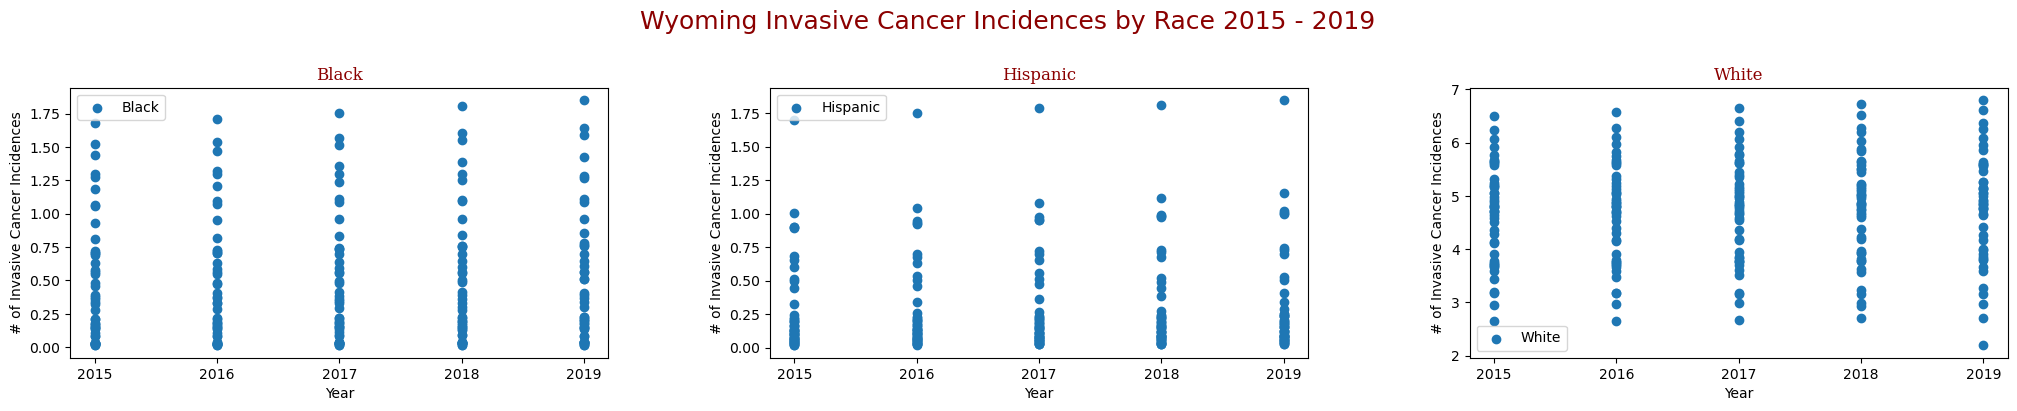

In [301]:
font = {'family': 'serif', 'color': 'darkred', 'weight': 'normal', 'size': 12}

for i, year in df_merge_state.iterrows():
    fig = plt.figure(figsize=(25,6))
    fig.subplots_adjust(wspace=.3, top=.85, bottom=.4)
    fig.suptitle(f'{state[0]} Invasive Cancer Incidences by Race 2015 - 2019', fontsize=18, ha='center', color='darkred')

    for n, race in df_merge_race.iterrows():
        ax = fig.add_subplot(1, 3, n + 1)
        x = df_analysis.loc[(df_analysis['Race_Clean'] == race[0]) & (df_analysis['State'] == state[0]), 'Year'].values.astype(str)
        y = df_analysis.loc[(df_analysis['Race_Clean'] == race[0]) & (df_analysis['State'] == state[0]), 'Insidents_per_capita'].values.astype(float)
        ax.plot(x, y, label=race[0])
        ax.set_xlabel('Year')
        ax.set_ylabel('# of Invasive Cancer Incidences')
        ax.legend()
        ax.set_title(f'{race[0]}', fontdict=font)
        # fig.tight_layout()
    

In [120]:
output = df_pop

In [121]:
filename = 'C:/C_Drive/Bootcamp/ProjectData/output-%s.xlsx' % get_dt()
with pd.ExcelWriter(filename) as writer:
    output.to_excel(writer, sheet_name='data')